In this project, we'll be analyzing data on the **Star Wars** movies

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="latin-1")
#  data set has some characters that aren't in Python's default utf-8 encoding

In [2]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location (Census Region)` - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a **Yes** or **No** response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a **Yes** or **No** respone

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

We'll need to remove the invalid rows. For example, `RespondentID` is supposed to be a **unique ID** for each respondent, but it's blank in some rows. We'll need to remove any rows with an invalid `RespondentID`

In [3]:
star_wars["RespondentID"].unique()

array([           nan, 3.29288000e+09, 3.29287954e+09, ...,
       3.28837529e+09, 3.28837307e+09, 3.28837292e+09])

In [4]:
star_wars = star_wars[star_wars["RespondentID"].notnull()] # star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [5]:
star_wars["RespondentID"].unique()

array([3.29288000e+09, 3.29287954e+09, 3.29276527e+09, ...,
       3.28837529e+09, 3.28837307e+09, 3.28837292e+09])

In [6]:
# Convert the Have you seen any of the 6 films in the Star Wars franchise?

# Convert the Do you consider yourself to be a fan of the Star Wars film franchise?

maping  = {"Yes":True, "No": False}

cols = ["Have you seen any of the 6 films in the Star Wars franchise?",
        "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for c in cols:
    star_wars[c] = star_wars[c].map(maping)

In [7]:
for c in cols:
    print(star_wars[c].unique())

[ True False]
[True nan False]


In [8]:
star_wars["Unnamed: 8"].unique()

array(['Star Wars: Episode VI Return of the Jedi', nan], dtype=object)

In [9]:
import numpy as np
mapping = {'Star Wars: Episode I  The Phantom Menace': True, np.nan : False, 
           'Star Wars: Episode II  Attack of the Clones':True,
          'Star Wars: Episode III  Revenge of the Sith': True,
          'Star Wars: Episode IV  A New Hope':True,
          'Star Wars: Episode V The Empire Strikes Back':True,
          'Star Wars: Episode VI Return of the Jedi':True}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mapping)
    

In [10]:
for col in star_wars.columns[3:9]:
    print(star_wars[col].unique())

[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]


In [11]:
star_wars["Unnamed: 8"].unique()

array([ True, False])

In [12]:
# rename columns

star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        }, inplace = True)

In [13]:
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN

In [14]:

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })



In [15]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [16]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [17]:
star_wars[star_wars.columns[9:15]] .mean(axis = 0)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

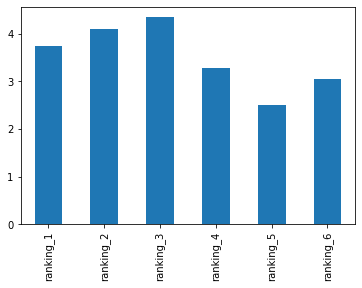

In [24]:
import matplotlib.pyplot as plt

(star_wars[star_wars.columns[9:15]] .mean(axis = 0)).plot.bar() # plt.bar(np.arange(6) +.75, star_wars[star_wars.columns[9:15]] .mean(axis = 0))
plt.show()

In [19]:
# how many people have seen each movie
star_wars.iloc[:,3:8].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
dtype: int64

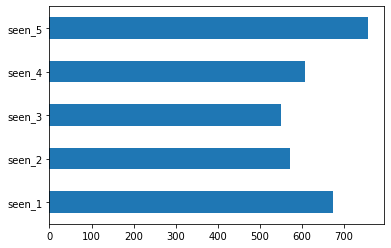

In [25]:
star_wars.iloc[:,3:8].sum().plot.barh()
plt.show()

In [21]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

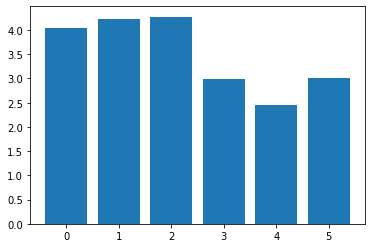

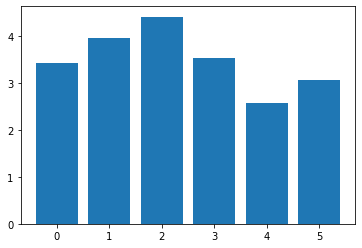

In [22]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

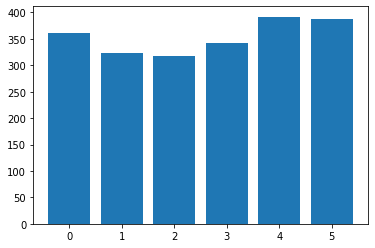

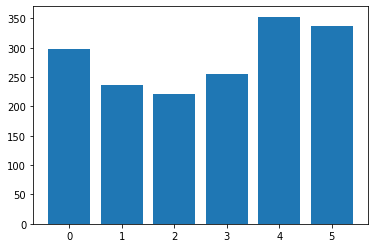

In [23]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

# Male/Female differences in favorite Star Wars movie and most seen movie
Interestingly, more males watches episodes 1-3, but males liked them far less than females did.